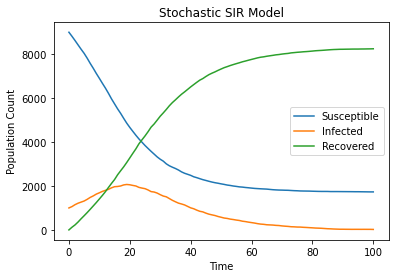

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the stochastic SIR model
def simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps):
    # Initialize compartments: S (Susceptible), I (Infected), R (Recovered)
    S = population_size - initial_infected
    I = initial_infected
    R = 0

    # Lists to store the population counts at each time step
    susceptible_count = [S]
    infected_count = [I]
    recovered_count = [R]

    # Simulate the model for the specified number of time steps
    for t in range(time_steps):
        # Calculate the rates of infection and recovery
        infection_probability = infection_rate * I / population_size
        recovery_probability = recovery_rate

        # Determine the number of new infections and recoveries
        new_infections = np.random.binomial(S, infection_probability)
        new_recoveries = np.random.binomial(I, recovery_probability)

        # Update the compartment counts
        S -= new_infections
        I += new_infections - new_recoveries
        R += new_recoveries

        # Append the current population counts to the lists
        susceptible_count.append(S)
        infected_count.append(I)
        recovered_count.append(R)

    return susceptible_count, infected_count, recovered_count

# Set the parameters for the simulation
population_size = 10000
initial_infected = 1000
infection_rate = 0.2
recovery_rate = 0.1
time_steps = 100

# Run the simulation
susceptible, infected, recovered = simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps)

# Plot the results
time = np.arange(time_steps + 1)
plt.plot(time, susceptible, label='Susceptible')
plt.plot(time, infected, label='Infected')
plt.plot(time, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.title('Stochastic SIR Model')
plt.legend()
plt.show()


(a) What is the likelihood that the disease will disappear

In [7]:
import numpy as np

# Function to calculate the likelihood of disease disappearance
def calculate_disappearance_likelihood(population_size, initial_infected, infection_rate, recovery_rate, time_steps, num_simulations):
    disappearance_count = 0

    for _ in range(num_simulations):
        _, infected, _ = simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps)

        if all(count == 0 for count in infected):
            disappearance_count += 1

    likelihood = disappearance_count / num_simulations
    return likelihood

# Set the parameters for the calculation
population_size = 10000
initial_infected = 500
infection_rate = 0.1
recovery_rate = 0.3
time_steps = 10000
num_simulations = 1000

# Calculate the likelihood of disease disappearance
likelihood = calculate_disappearance_likelihood(population_size, initial_infected, infection_rate, recovery_rate, time_steps, num_simulations)

print("Likelihood of disease disappearance:", likelihood)


Likelihood of disease disappearance: 0.0


(b) Can the disease exhibit cyclical behaviour

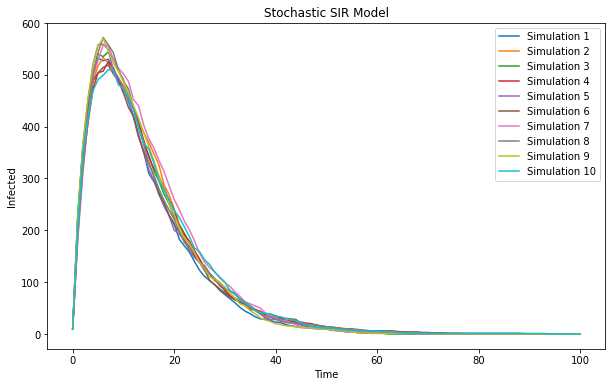

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the stochastic SIR model
def simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps):
    susceptible = [population_size - initial_infected]
    infected = [initial_infected]
    recovered = [0]

    for _ in range(time_steps):
        new_infections = np.random.binomial(susceptible[-1], infection_rate)
        new_recoveries = np.random.binomial(infected[-1], recovery_rate)

        susceptible.append(susceptible[-1] - new_infections)
        infected.append(infected[-1] + new_infections - new_recoveries)
        recovered.append(recovered[-1] + new_recoveries)

    return susceptible, infected, recovered

# Set the parameters for the simulation
population_size = 1000
initial_infected = 10
infection_rate = 0.2
recovery_rate = 0.1
time_steps = 100

# Perform multiple simulations
num_simulations = 10
simulations = []

for _ in range(num_simulations):
    susceptible, infected, recovered = simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps)
    simulations.append(infected)

# Plot the results
time = range(time_steps + 1)
plt.figure(figsize=(10, 6))

for i, infected in enumerate(simulations):
    plt.plot(time, infected, label=f"Simulation {i+1}")

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Stochastic SIR Model")
plt.legend()
plt.show()


(c) For a highly deadly disease can the population be extinguished?

In [12]:
import numpy as np

# Function to simulate the stochastic SIR model
def simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps):
    susceptible = [population_size - initial_infected]
    infected = [initial_infected]
    recovered = [0]

    for _ in range(time_steps):
        new_infections = np.random.binomial(susceptible[-1], infection_rate)
        new_recoveries = np.random.binomial(infected[-1], recovery_rate)

        susceptible.append(susceptible[-1] - new_infections)
        infected.append(infected[-1] + new_infections - new_recoveries)
        recovered.append(recovered[-1] + new_recoveries)

        # Check if all infected individuals have recovered
        if infected[-1] == 0:
            break

    return infected[-1] == 0

# Set the parameters for the simulation
population_size = 1000
initial_infected = 10
infection_rate = 0.9
recovery_rate = 0.1
time_steps = 100

# Perform multiple simulations
num_simulations = 100
extinction_count = 0

for _ in range(num_simulations):
    if simulate_sir_model(population_size, initial_infected, infection_rate, recovery_rate, time_steps):
        extinction_count += 1

extinction_probability = extinction_count / num_simulations

print("Probability of disease extinction:", extinction_probability)


Probability of disease extinction: 0.93


(d) For which population sizes and parameter values are deterministic models
based on differential equations of sufficient precision

Deterministic models based on differential equations are typically considered to be sufficient when the population size is large and the disease transmission dynamics are well-mixed within the population. In other words, when individual-level heterogeneity and stochastic effects can be assumed to have a negligible impact on the overall dynamics of the disease.

The conditions under which deterministic models provide sufficient precision can vary depending on the specific disease and the complexity of the model. However, some general guidelines can be considered:

Large population size: Deterministic models tend to provide accurate predictions when the population size is large. As the population size increases, the impact of stochastic fluctuations decreases, and the deterministic approximation becomes more reliable.

Well-mixed population: Deterministic models assume that the population is well-mixed, meaning that individuals have equal chances of interacting with each other. This assumption is reasonable when the disease transmission occurs through random contacts within the population. If the population is structured or the disease transmission depends on specific social networks or spatial interactions, stochastic models may be more appropriate.

Homogeneous mixing: Deterministic models assume homogeneous mixing, where individuals have equal contact rates and similar susceptibility to the disease. If there are significant variations in contact rates or susceptibility among individuals, stochastic models or more complex deterministic models that incorporate heterogeneity may be necessary.

Low prevalence or early stages of the epidemic: Deterministic models tend to work well when the disease prevalence is low or during the early stages of an epidemic. In these situations, the impact of stochastic effects is minimal, and the disease dynamics can be accurately described by the deterministic equations.

To make the basic SIR model more complex, you can introduce additional compartments, factors, or mechanisms to capture more realistic aspects of disease transmission and progression. Here are a few suggestions:

Age or demographic structure: Divide the population into different age groups or demographic categories and incorporate age-specific contact rates, susceptibility, and disease progression parameters. This can account for variations in disease transmission and severity across different age groups.

Spatial structure: Incorporate spatial dynamics by dividing the population into regions or geographic areas and consider movement and interactions between these areas. This can be important for capturing the spread of diseases that exhibit spatial patterns or are influenced by factors such as travel or migration.

Treatment or interventions: Introduce compartments for individuals undergoing treatment or receiving interventions such as vaccination or quarantine. This can allow you to model the impact of different control measures on disease spread and assess the effectiveness of interventions.

Latent period or incubation period: Include an additional compartment to represent the period between infection and the onset of infectiousness. This can capture the latency or incubation period of the disease, which is relevant for diseases with an asymptomatic or pre-symptomatic phase.

Immunity dynamics: Extend the model to incorporate different types of immunity, such as temporary or long-lasting immunity, waning immunity, or partial immunity. This can help understand the dynamics of recurring infections or the impact of vaccination on population-level immunity.

Network structure: Consider incorporating network-based transmission dynamics, where individuals are connected through specific social networks or contact patterns. This can be relevant for diseases that spread through close contacts or specific social interactions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000
initial_infections = 10
recovery_rate = 0.1
infection_rate = 0.8
contact_matrix = np.random.rand(population_size, population_size)  # Example contact matrix

# Initialize compartments
susceptible = population_size - initial_infections
infected = initial_infections
recovered = 0

# Simulation loop
time_steps = 100
susceptible_list = [susceptible]
infected_list = [infected]
recovered_list = [recovered]

for t in range(time_steps):
    # Calculate new infections
    new_infections = np.sum(infected * contact_matrix * infection_rate / population_size)
    
    # Update compartments
    susceptible -= new_infections
    infected += new_infections * (1 - recovery_rate)
    recovered += infected * recovery_rate
    
    # Append current compartment sizes to lists
    susceptible_list.append(susceptible)
    infected_list.append(infected)
    recovered_list.append(recovered)

# Plot the results
plt.plot(range(time_steps + 1), susceptible_list, label='Susceptible')
plt.plot(range(time_steps + 1), infected_list, label='Infected')
plt.plot(range(time_steps + 1), recovered_list, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
